# 测试 Tedd

In [1]:
import numpy as np
from IPython.display import display_svg
from tvm import te, build, lower
from tvm_book.testing.relay.viz import graphviz_relay
from tvm.contrib import tedd

In [4]:
A = te.placeholder((1,), name="A")
B = te.placeholder((1,), name="B")
C = te.compute(A.shape, lambda i: A[i] + B[i], name="C")
sch = te.create_schedule(C.op)
ir_mod = lower(sch, [A, B, C], name="test_add")
rt_mod = build(ir_mod, target="llvm")
func = te.create_prim_func([A, B, C])
func.show()

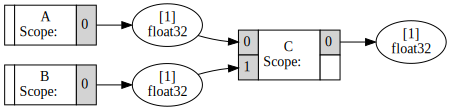

In [5]:
graph = tedd.viz_dataflow_graph(sch, show_svg=True)
display_svg(graph)

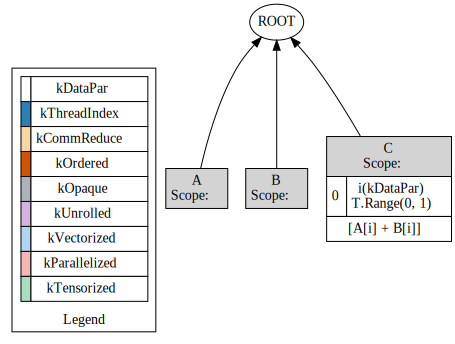

In [6]:
sch = sch.normalize()
tree = tedd.viz_schedule_tree(sch, show_svg=True)

# tedd.viz_schedule_tree(s, dot_file_path="/tmp/scheduletree.dot")
display_svg(tree)

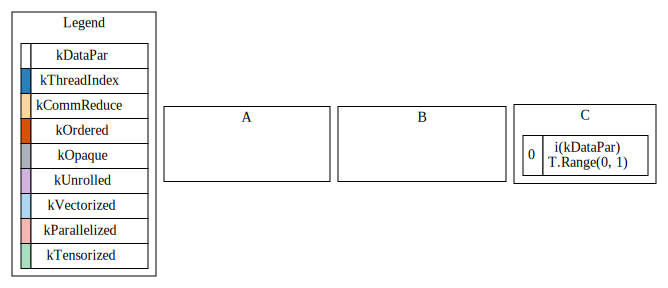

In [7]:
from graphviz import Source
# tedd.viz_itervar_relationship_graph(s, dot_file_path="/tmp/itervar.dot")
dot_string = tedd.viz_itervar_relationship_graph(sch, output_dot_string=True)
src = Source(dot_string)
display_svg(src)

In [8]:
m = te.var("m")
n = te.var("n")
X = te.placeholder((m, n), name="X")
s_state = te.placeholder((m, n))
s_init = te.compute((1, n), lambda _, i: X[0, i])
s_update = te.compute((m, n), lambda t, i: s_state[t-1, i] + X[t, i])
res = te.scan(s_init, s_update, s_state, X)
sch = te.create_schedule(res.op)
sch = sch.normalize() # 类型和 shape 推断

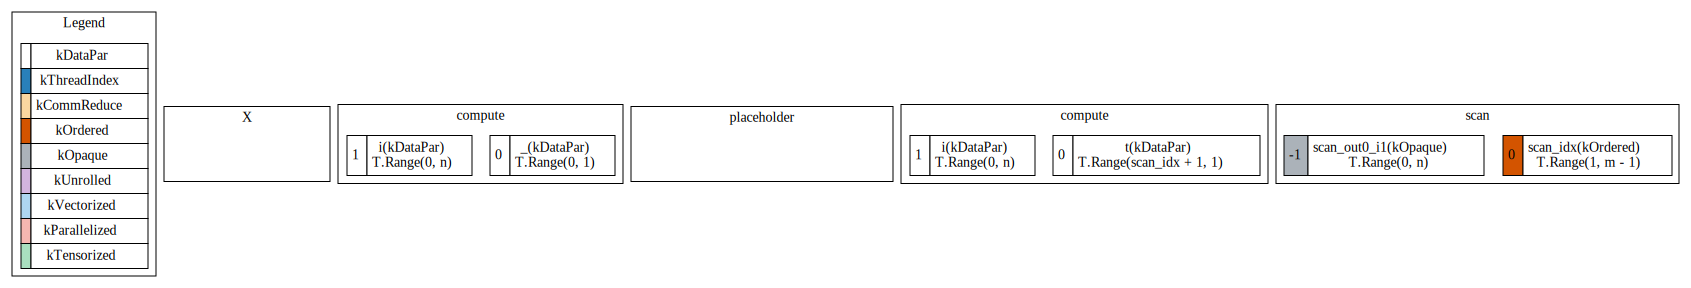

In [9]:
from graphviz import Source
# tedd.viz_itervar_relationship_graph(s, dot_file_path="/tmp/itervar.dot")
dot_string = tedd.viz_itervar_relationship_graph(sch, output_dot_string=True)
src = Source(dot_string)
display_svg(src)

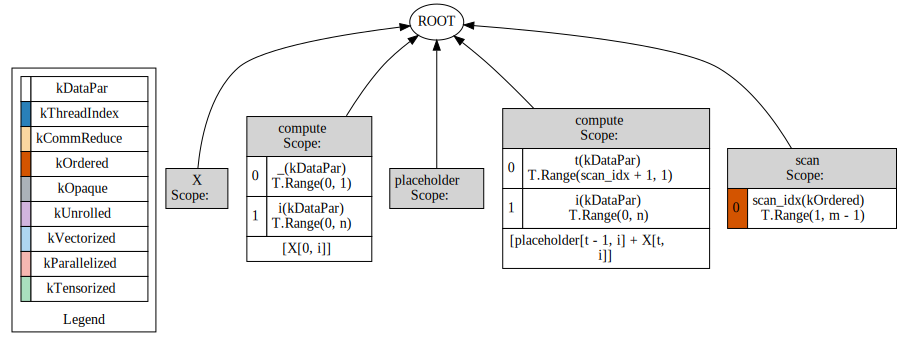

In [10]:
tree = tedd.viz_schedule_tree(sch, show_svg=True)

# tedd.viz_schedule_tree(s, dot_file_path="/tmp/scheduletree.dot")
display_svg(tree)

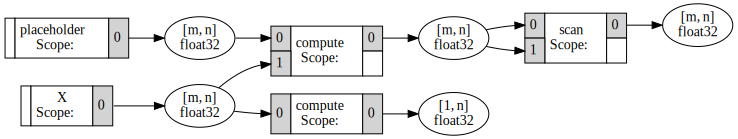

In [11]:
graph = tedd.viz_dataflow_graph(sch, show_svg=True)
display_svg(graph)